In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (50,30)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel("Airlines+Data.xlsx", parse_dates=True)

In [3]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
t = []
for i in range(1,97):
    t.append(i)

df['t']=t

In [5]:
df

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5
...,...,...,...
91,2002-08-01,405,92
92,2002-09-01,355,93
93,2002-10-01,306,94
94,2002-11-01,271,95


In [6]:
df['log_Passengers'] = np.log(df['Passengers'])

In [7]:
df

,Month,Passengers,t,log_Passengers
0,1995-01-01,112,1,4.718499
1,1995-02-01,118,2,4.770685
2,1995-03-01,132,3,4.882802
3,1995-04-01,129,4,4.859812
4,1995-05-01,121,5,4.795791
...,...,...,...,...
91,2002-08-01,405,92,6.003887
92,2002-09-01,355,93,5.872118
93,2002-10-01,306,94,5.723585
94,2002-11-01,271,95,5.602119


In [8]:
df['t_square'] = np.square(df['t'])

In [9]:
df

,Month,Passengers,t,log_Passengers,t_square
0,1995-01-01,112,1,4.718499,1
1,1995-02-01,118,2,4.770685,4
2,1995-03-01,132,3,4.882802,9
3,1995-04-01,129,4,4.859812,16
4,1995-05-01,121,5,4.795791,25
...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464
92,2002-09-01,355,93,5.872118,8649
93,2002-10-01,306,94,5.723585,8836
94,2002-11-01,271,95,5.602119,9025


In [10]:
df['Month'] = pd.to_datetime(df['Month'])
df

,Month,Passengers,t,log_Passengers,t_square
0,1995-01-01,112,1,4.718499,1
1,1995-02-01,118,2,4.770685,4
2,1995-03-01,132,3,4.882802,9
3,1995-04-01,129,4,4.859812,16
4,1995-05-01,121,5,4.795791,25
...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464
92,2002-09-01,355,93,5.872118,8649
93,2002-10-01,306,94,5.723585,8836
94,2002-11-01,271,95,5.602119,9025


In [11]:
df['Month_Name'] = df['Month'].dt.strftime('%B')

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['Month_Name'])

# Get only the first 12 columns (12 months)
one_hot_encoded = one_hot_encoded.iloc[:, :12]

In [12]:
df = pd.concat([df, one_hot_encoded], axis=1)


In [13]:
df = df.replace({True: 1, False: 0})

In [14]:
df

,Month,Passengers,t,log_Passengers,t_square,Month_Name,April,August,December,February,January,July,June,March,May,November,October,September
0,1995-01-01,112,1,4.718499,1,January,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4.770685,4,February,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,4.882802,9,March,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,4.859812,16,April,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,4.795791,25,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464,August,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,5.872118,8649,September,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,5.723585,8836,October,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,5.602119,9025,November,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
df['Month_Name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [16]:
df = df.drop(columns='Month_Name')

In [17]:
df

,Month,Passengers,t,log_Passengers,t_square,April,August,December,February,January,July,June,March,May,November,October,September
0,1995-01-01,112,1,4.718499,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4.770685,4,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,4.882802,9,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,4.859812,16,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,4.795791,25,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,5.872118,8649,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,5.723585,8836,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,5.602119,9025,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
df["year"] = df['Month'].dt.strftime("%Y")

In [19]:
df.columns

Index(['Month', 'Passengers', 't', 'log_Passengers', 't_square', 'April',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'year'],
      dtype='object')

<Axes: xlabel='year', ylabel='Passengers'>

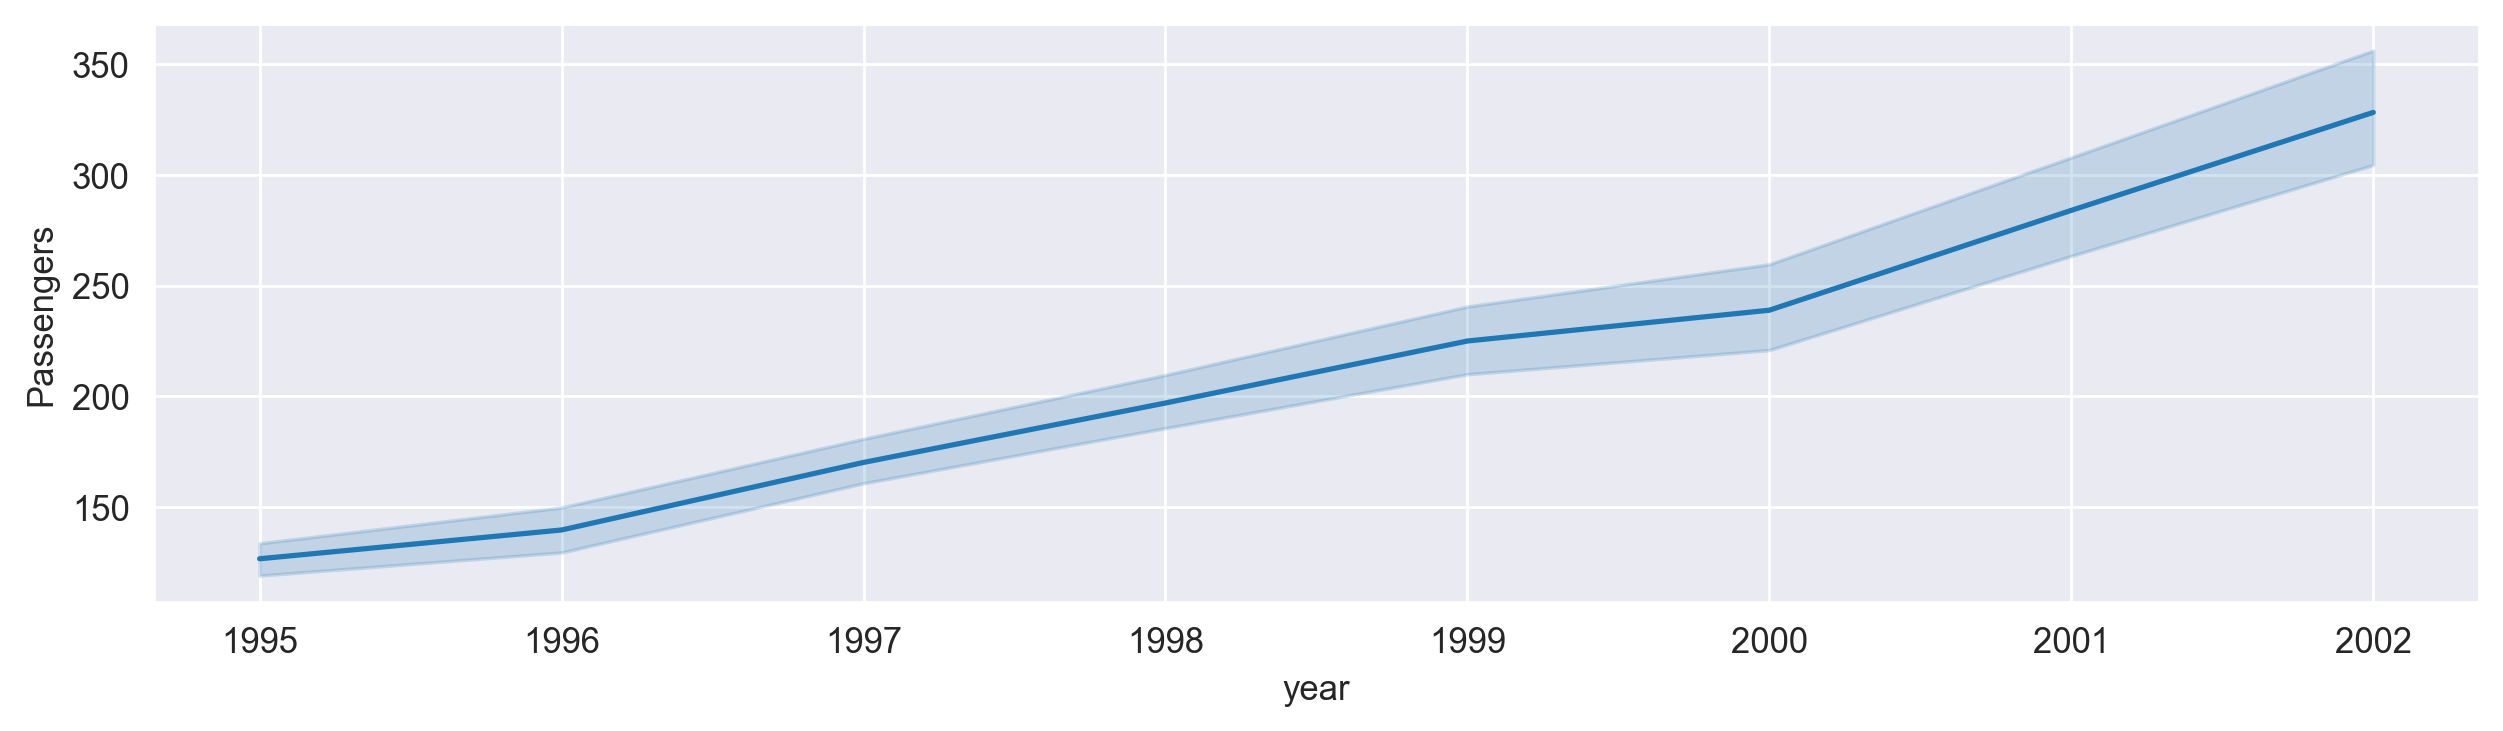

In [20]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

In [21]:
Train = df.head(77)
Test = df.tail(19)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Passengers'], pred_linear))
rmse_linear

58.14854431950882

In [24]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Passengers'], pred_Exp))
rmse_Exp

316.84269101803227

In [25]:
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_Quad))
rmse_Quad

58.92632852818821

In [26]:
add_sea = smf.ols('Passengers~April+August+December+February+January+July+June+March+May+November+October+September',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['April',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea))
rmse_add_sea

133.31540360112723

In [27]:
add_sea_Quad = smf.ols('Passengers~t+t_square+April+August+December+February+January+July+June+March+May+November+October+September',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['April',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September','t','t_square']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

39.61752923079636

In [28]:
Mul_Add_sea = smf.ols('log_Passengers~t+April+August+December+February+January+July+June+March+May+November+October+September',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea 

316.80937822323216

In [29]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
4,rmse_add_sea_quad,39.617529
0,rmse_linear,58.148544
2,rmse_Quad,58.926329
3,rmse_add_sea,133.315404
5,rmse_Mult_sea,316.809378
1,rmse_Exp,316.842691
